# Classification_CNN

## Method

Build Convolutional Neural Network model with Tensorflow.

```
X_train: 10000 samples * 5 times of training
X_test: 10000 samples

* used (X_test, Y_test) in validation data.

batch_size: 128
epochs: 100
```

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Load dataset, Preprocessing

In [2]:
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Convolution2D, MaxPooling2D, Flatten

Using TensorFlow backend.


In [3]:
output_dim = nb_classes = 10

In [4]:
input_dim = (32,32,3)
X_train = X_train.reshape(50000, *input_dim)
X_test = X_test.reshape(10000, *input_dim)

print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [6]:
print(input_dim, X_train.shape, Y_train.shape, output_dim)

(32, 32, 3) (50000, 32, 32, 3) (50000, 10) 10


## Build Model

In [14]:
model = Sequential()

# 32,32
model.add(Convolution2D(8,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 8)         32        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 10)        170       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 16)       

In [16]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
batch_size=128
epochs=100
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 398us/sample - loss: 2.2858 - accuracy: 0.1380 - val_loss: 2.2631 - val_accuracy: 0.1727
Epoch 2/100
50000/50000 [==============================] - 17s 348us/sample - loss: 2.2437 - accuracy: 0.1959 - val_loss: 2.2189 - val_accuracy: 0.2298
Epoch 3/100
50000/50000 [==============================] - 18s 351us/sample - loss: 2.1862 - accuracy: 0.2399 - val_loss: 2.1516 - val_accuracy: 0.2462
Epoch 4/100
50000/50000 [==============================] - 17s 345us/sample - loss: 2.1220 - accuracy: 0.2607 - val_loss: 2.0920 - val_accuracy: 0.2651
Epoch 5/100
50000/50000 [==============================] - 17s 347us/sample - loss: 2.0648 - accuracy: 0.2734 - val_loss: 2.0347 - val_accuracy: 0.2808
Epoch 6/100
50000/50000 [==============================] - 17s 346us/sample - loss: 2.0146 - accuracy: 0.2857 - val_loss: 1.9911 - val_accuracy: 0.2921
Epoch 7/100
50000/50000 [=============

In [19]:
import matplotlib.pyplot as plt

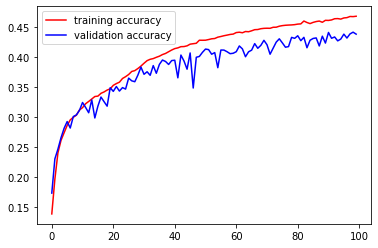

In [20]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

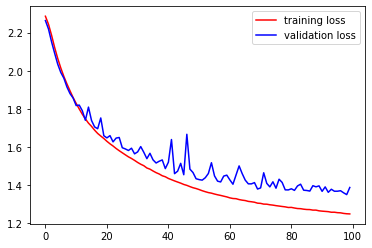

In [21]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

## Inference

In [22]:
predictions = model.predict_classes(X_test)

In [26]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import numpy as np

# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

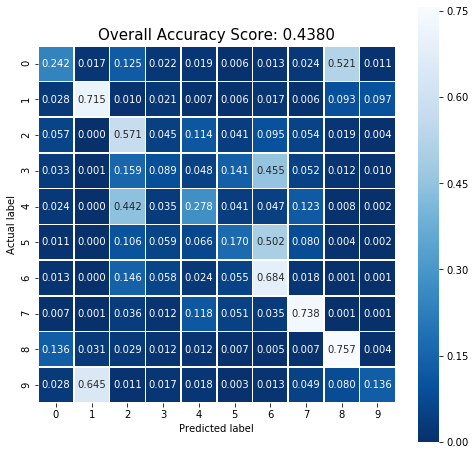

In [27]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0:.4f}'.format(score[1])
plt.title(all_sample_title, size = 15);
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();

## arch 2 fiter & layer increase

In [7]:
model = Sequential()

# 32,32
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(256,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 4))

model.add(Flatten())
model.add(Activation('softmax'))

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 10)        650       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [9]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
batch_size=128
epochs=100
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 67s 1ms/sample - loss: 2.2601 - accuracy: 0.1518 - val_loss: 2.2173 - val_accuracy: 0.1878
Epoch 2/100
50000/50000 [==============================] - 61s 1ms/sample - loss: 2.1727 - accuracy: 0.2186 - val_loss: 2.1428 - val_accuracy: 0.2467
Epoch 3/100
50000/50000 [==============================] - 60s 1ms/sample - loss: 2.1101 - accuracy: 0.2594 - val_loss: 2.0828 - val_accuracy: 0.2728
Epoch 4/100
50000/50000 [==============================] - 60s 1ms/sample - loss: 2.0525 - accuracy: 0.2790 - val_loss: 2.0723 - val_accuracy: 0.2619
Epoch 5/100
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.9998 - accuracy: 0.2951 - val_loss: 1.9857 - val_accuracy: 0.2916
Epoch 6/100
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.9491 - accuracy: 0.3058 - val_loss: 1.9415 - val_accuracy: 0.2943
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.0792 - accuracy: 0.5323 - val_loss: 1.5324 - val_accuracy: 0.3968
Epoch 56/100
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.0742 - accuracy: 0.5313 - val_loss: 1.5236 - val_accuracy: 0.3992
Epoch 57/100
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.0693 - accuracy: 0.5377 - val_loss: 1.5409 - val_accuracy: 0.3936
Epoch 58/100
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.0651 - accuracy: 0.5411 - val_loss: 1.5450 - val_accuracy: 0.3876
Epoch 59/100
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.0582 - accuracy: 0.5385 - val_loss: 1.5466 - val_accuracy: 0.3937
Epoch 60/100
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.0540 - accuracy: 0.5411 - val_loss: 1.5941 - val_accuracy: 0.3737
Epoch 61/100
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.0506 - ac

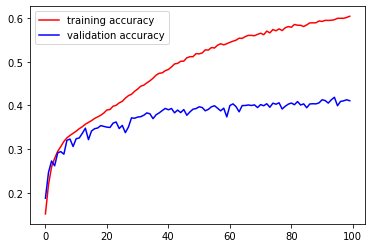

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

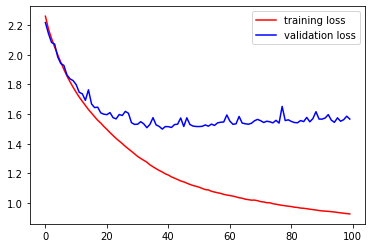

In [13]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [14]:
predictions_2 = model.predict_classes(X_test)

## arch 2 fiter increase

In [17]:
model = Sequential()

# 32,32
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 10)        650       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 128)      

In [19]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
batch_size=128
epochs=100
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 55s 1ms/sample - loss: 2.2796 - accuracy: 0.1336 - val_loss: 2.2590 - val_accuracy: 0.1662
Epoch 2/100
50000/50000 [==============================] - 54s 1ms/sample - loss: 2.2273 - accuracy: 0.2057 - val_loss: 2.2071 - val_accuracy: 0.2199
Epoch 3/100
50000/50000 [==============================] - 53s 1ms/sample - loss: 2.1757 - accuracy: 0.2383 - val_loss: 2.1594 - val_accuracy: 0.2438
Epoch 4/100
50000/50000 [==============================] - 53s 1ms/sample - loss: 2.1218 - accuracy: 0.2950 - val_loss: 2.1044 - val_accuracy: 0.3003
Epoch 5/100
50000/50000 [==============================] - 53s 1ms/sample - loss: 2.0616 - accuracy: 0.3389 - val_loss: 2.0551 - val_accuracy: 0.3255
Epoch 6/100
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.9984 - accuracy: 0.3583 - val_loss: 2.0050 - val_accuracy: 0.3372
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.1141 - accuracy: 0.5186 - val_loss: 1.3951 - val_accuracy: 0.4480
Epoch 56/100
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.1073 - accuracy: 0.5231 - val_loss: 1.4007 - val_accuracy: 0.4457
Epoch 57/100
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.0991 - accuracy: 0.5246 - val_loss: 1.4013 - val_accuracy: 0.4532
Epoch 58/100
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.0971 - accuracy: 0.5251 - val_loss: 1.4863 - val_accuracy: 0.4282
Epoch 59/100
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.0917 - accuracy: 0.5261 - val_loss: 1.3934 - val_accuracy: 0.4462
Epoch 60/100
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.0860 - accuracy: 0.5286 - val_loss: 1.4218 - val_accuracy: 0.4505
Epoch 61/100
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.0850 - ac

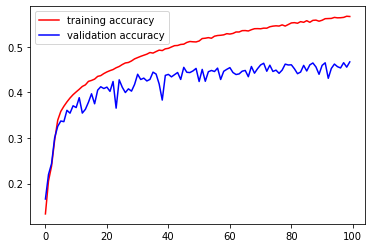

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

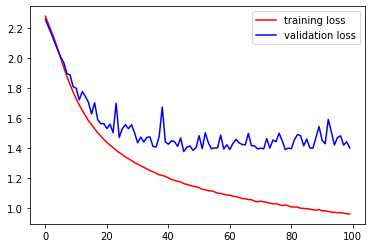

In [22]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [23]:
predictions_3 = model.predict_classes(X_test)